In [1]:
import numpy as np
from spec_id import Scale_model, Cluster, Cluster_model,Gauss_dist,Divide_cont,Cluster_fit
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [2]:
metal=np.arange(0.002,0.031,0.001)
# age=np.arange(7.0,14.1,.1)
age = [np.arange(5,13.1,.1),np.arange(4,13.1,.1),np.arange(9,14.1,.1),
       np.arange(9,14.1,.1),np.arange(9,14.1,.1),np.arange(9,14.1,.1)]
tau=[0]
# tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
#      9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

M,A=np.meshgrid(metal,age)

cluster=[6528,6553,5927,6304,6388,6441]

[[ 6 15]]
Best fit model is 5.6 Gyr and 0.017 Z


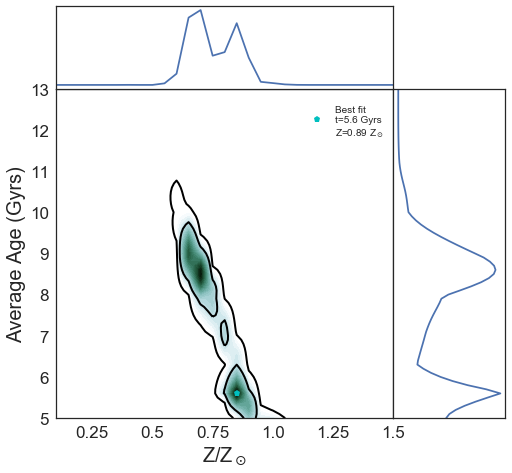

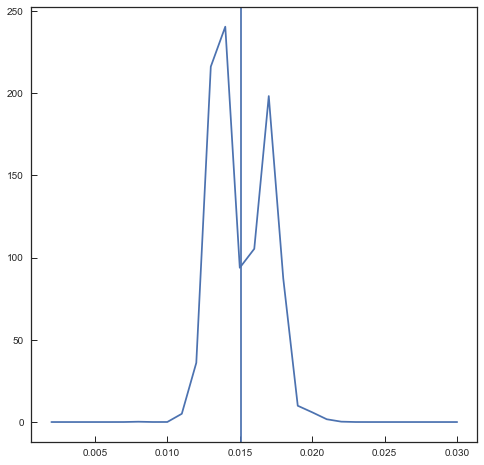

[[ 0 28]]
Best fit model is 5.0 Gyr and 0.03 Z


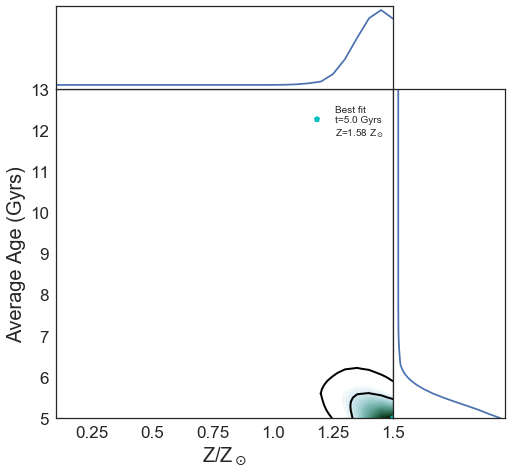

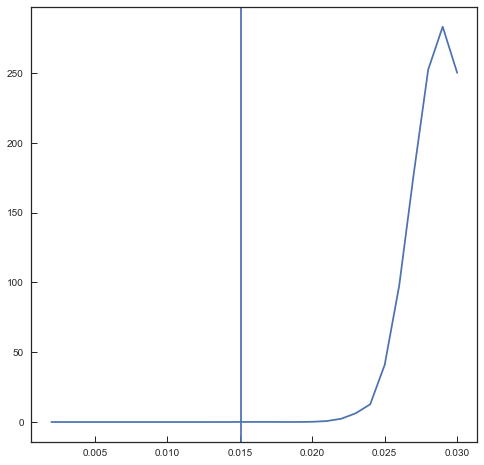

[[ 0 26]]
Best fit model is 5.0 Gyr and 0.028 Z


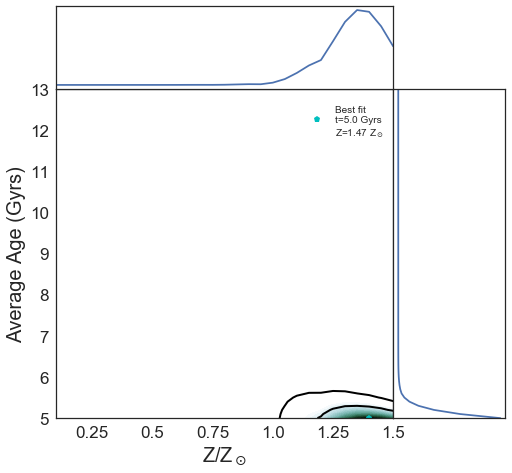

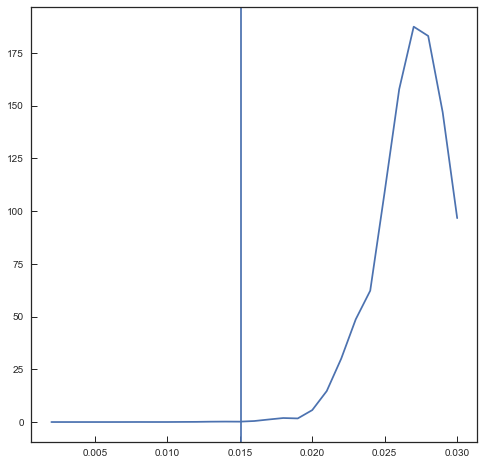

In [5]:
%matplotlib inline
rshift=[1.1,1.2,1.35]
age=np.arange(5,13.1,.1)
# mfits = [-0.1, -0.2, -0.64, -0.66, -0.68, -0.65]
for i in range(len(rshift)):
    ngc=Cluster('../clusters/ngc6528_griz_err_%s.npy' % rshift[i],rshift[i])
    ngc.Analyze_fit('../chidat/ngc6528_err_%s_chidata.fits' % rshift[i],metal,age,tau)
    # ngc.Analyze_fit_FC('../chidat/ngc%s_err_al_cont_chidata.fits' % cluster[i],
    #                    '../chidat/ngc%s_err_al_feat_chidata.fits' % cluster[i],metal,age[i],tau)
    ngc.Plot_2D_likelihood()
    plt.figure(figsize=[8,8])
    plt.plot(metal,ngc.MP)
    plt.axvline(10**(-.1)*.019)
    plt.show()
    plt.close()

[[30 23]]
Best fit model is 3.5 Gyr and 0.025 Z


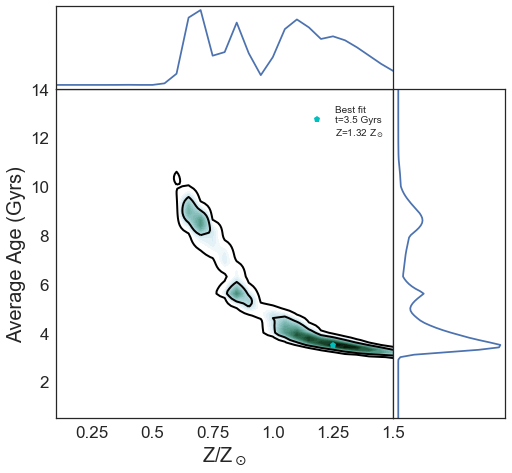

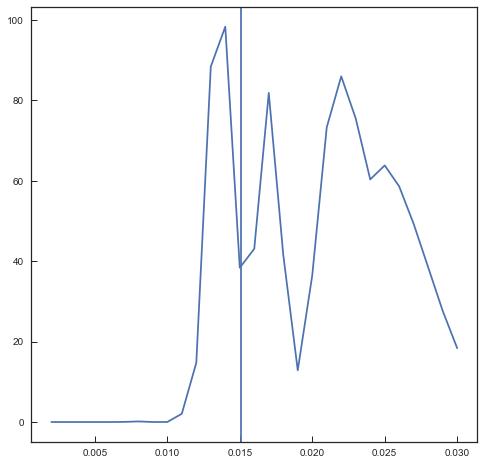

[[39 28]]
Best fit model is 4.4 Gyr and 0.03 Z


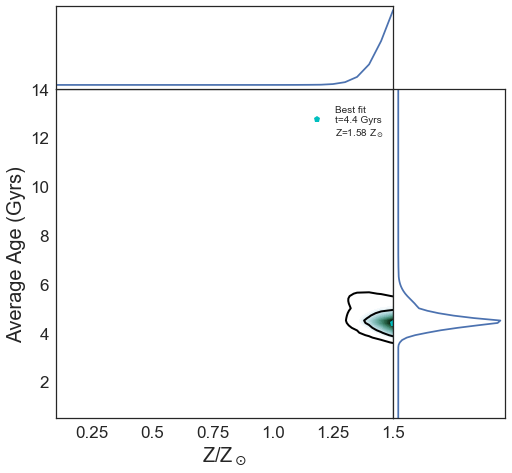

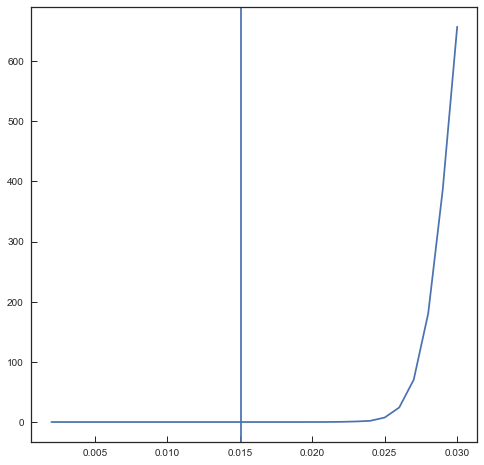

[[31 28]]
Best fit model is 3.6 Gyr and 0.03 Z


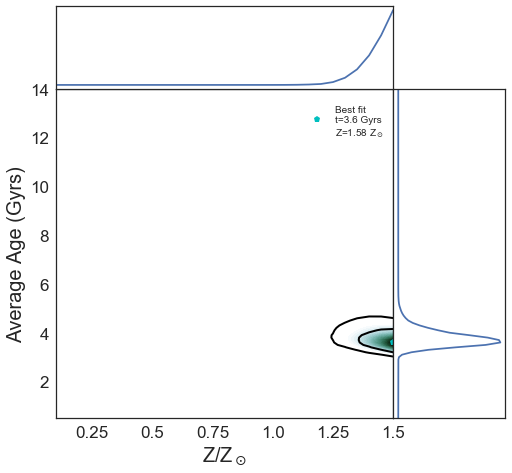

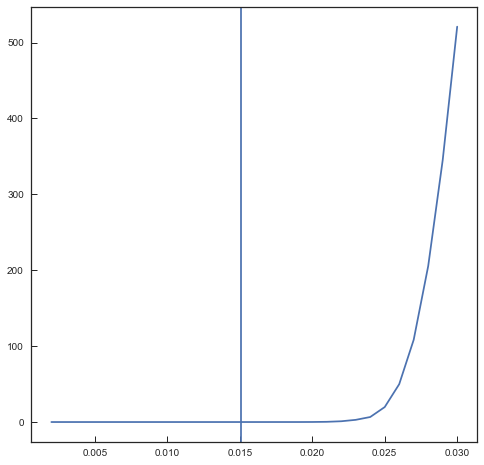

In [9]:
%matplotlib inline
rshift=[1.1,1.2,1.35]
age=np.arange(.5,14.1,.1)
# mfits = [-0.1, -0.2, -0.64, -0.66, -0.68, -0.65]
for i in range(len(rshift)):
    ngc=Cluster('../clusters/ngc6528_griz_err_%s.npy' % rshift[i],rshift[i])
    ngc.Analyze_fit('../chidat/ngc6528_err_%s_fa_chidata.fits' % rshift[i],metal,age,tau)
    # ngc.Analyze_fit_FC('../chidat/ngc%s_err_al_cont_chidata.fits' % cluster[i],
    #                    '../chidat/ngc%s_err_al_feat_chidata.fits' % cluster[i],metal,age[i],tau)
    ngc.Plot_2D_likelihood()
    plt.figure(figsize=[8,8])
    plt.plot(metal,ngc.MP)
    plt.axvline(10**(-.1)*.019)
    plt.show()
    plt.close()

[[56 12]]
Best fit model is 10.6 Gyr and 0.014 Z


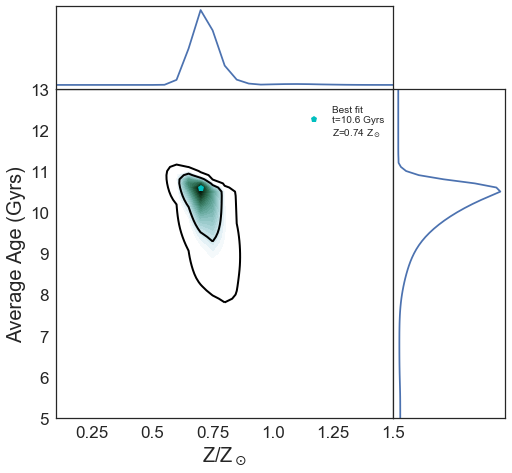

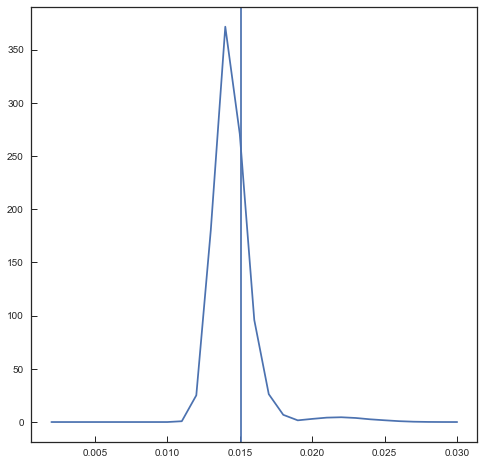

[[55 27]]
Best fit model is 10.5 Gyr and 0.029 Z


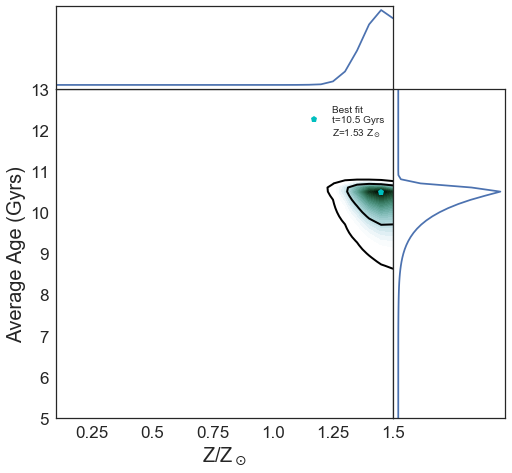

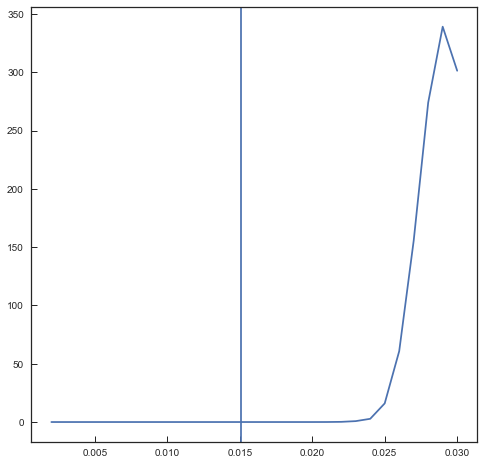

[[53 27]]
Best fit model is 10.3 Gyr and 0.029 Z


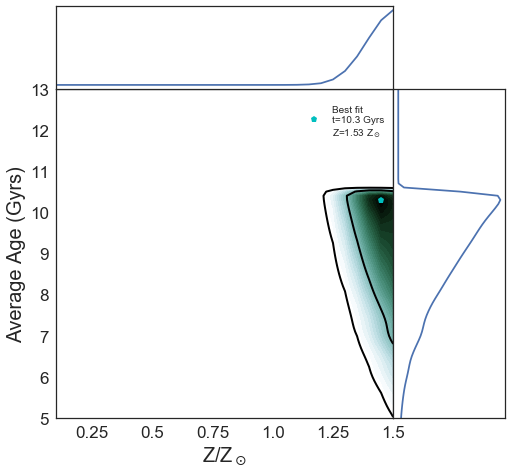

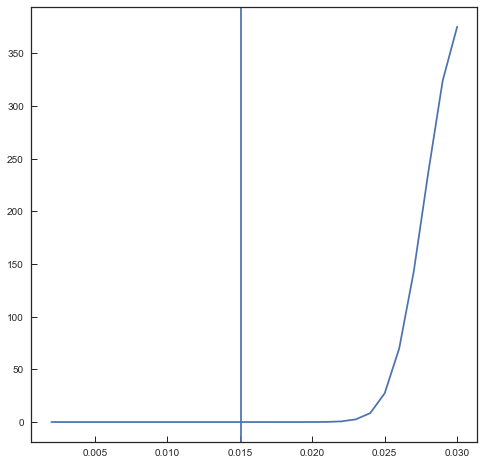

In [4]:
%matplotlib inline
rshift=[1.1,1.2,1.35]
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
age=np.arange(5,13.1,.1)
ngc=Cluster('../clusters/ngc6528_griz_err_1.1.npy' ,1.1)
ngc.Analyze_fit('../chidat/ngc6528_err_al_chidata.fits',metal,age,tau)
ngc.Plot_2D_likelihood()
plt.figure(figsize=[8,8])
plt.plot(metal,ngc.MP)
plt.axvline(10**(-.1)*.019)
plt.show()
plt.close()

for i in [1.2,1.35]:
    ngc=Cluster('../clusters/ngc6528_griz_err_%s.npy' % i,i)
    ngc.Analyze_fit('../chidat/ngc6528_err_al_%s_chidata.fits' % i,metal,age,tau)
    ngc.Plot_2D_likelihood()
    plt.figure(figsize=[8,8])
    plt.plot(metal,ngc.MP)
    plt.axvline(10**(-.1)*.019)
    plt.show()
    plt.close()

[[109  11]]
Best fit model is 11.4 Gyr and 0.013 Z


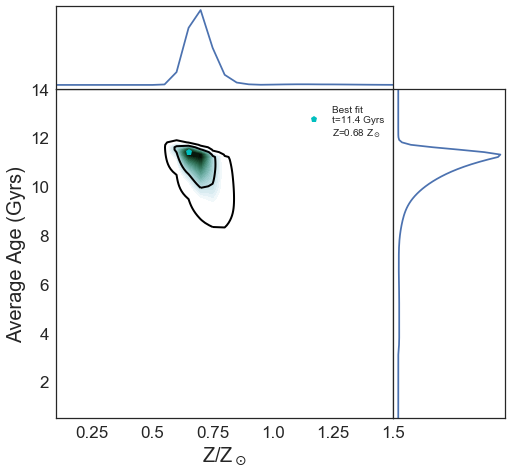

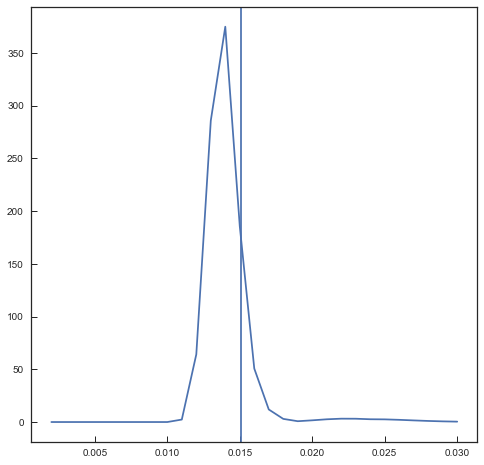

[[107  27]]
Best fit model is 11.2 Gyr and 0.029 Z


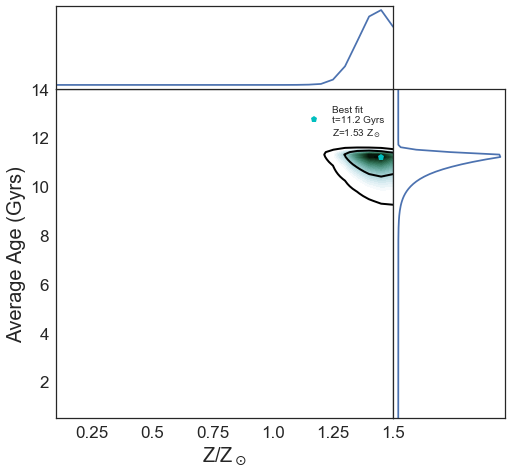

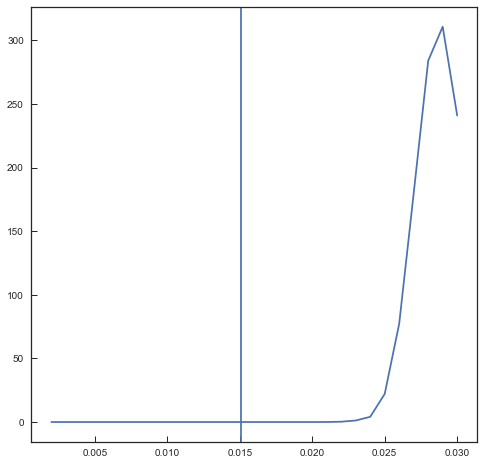

[[105  27]]
Best fit model is 11.0 Gyr and 0.029 Z


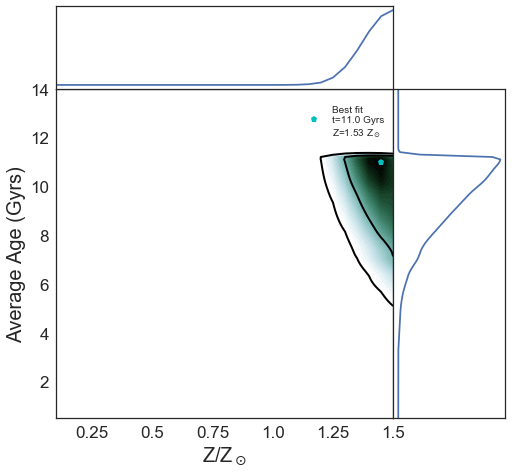

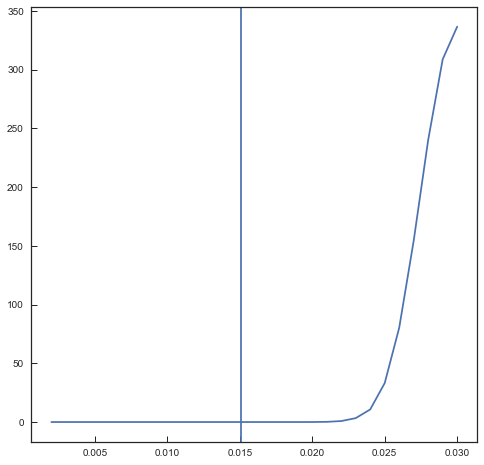

In [5]:
age=np.arange(.5,14.1,.1)
ngc=Cluster('../clusters/ngc6528_griz_err_1.1.npy' ,1.1)
ngc.Analyze_fit('../chidat/ngc6528_err_al_fa_chidata.fits',metal,age,tau)
# ngc.Analyze_fit_FC('../chidat/ngc%s_err_al_cont_chidata.fits' % cluster[i],
#                    '../chidat/ngc%s_err_al_feat_chidata.fits' % cluster[i],metal,age[i],tau)
ngc.Plot_2D_likelihood()
plt.figure(figsize=[8,8])
plt.plot(metal,ngc.MP)
plt.axvline(10**(-.1)*.019)
plt.show()
plt.close()

for i in [1.2,1.35]:
    ngc=Cluster('../clusters/ngc6528_griz_err_%s.npy' % i,i)
    ngc.Analyze_fit('../chidat/ngc6528_err_al_fa_%s_chidata.fits' % i,metal,age,tau)
    ngc.Plot_2D_likelihood()
    plt.figure(figsize=[8,8])
    plt.plot(metal,ngc.MP)
    plt.axvline(10**(-.1)*.019)
    plt.show()
    plt.close()

In [31]:
tau_grid = ngc.chi.T

ValueError: setting an array element with a sequence.

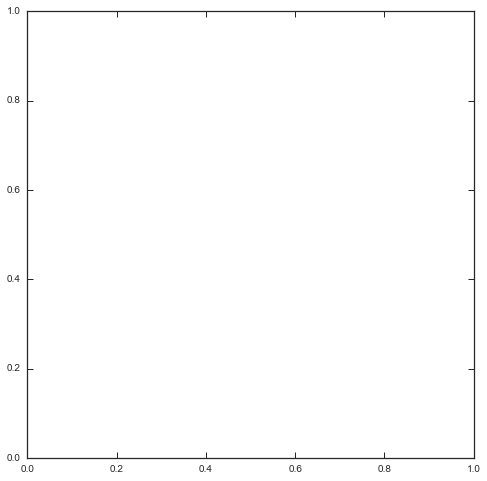

In [32]:
for i in range(len(tau_grid)):
    plt.figure(figsize=[8,8])
    plt.contour(M,A,np.exp(-tau_grid[i]/2),50)
    plt.show()
    plt.close()

In [ ]:
twod = fits.open('../chidat/ngc6528_err_chidata.fits')

In [ ]:
twod_dist = twod[1].data

In [ ]:
print twod_dist.T[-1]
print tau_grid[0][-1]

[ 608.44716121  297.53225273  212.47648486  191.70274379  176.81823125
  168.65721769  169.56295838  179.00955967  185.19301818  190.46910961
  209.03167862  233.52626088  265.34139127  304.56168866  336.70125713
  373.11816016  414.06201151  459.81706332  500.15116197  543.88118219
  590.98735747  641.46566478  695.32634279  724.41200998  755.14835075
  787.51549684  821.49792565  857.08398454  894.26547748]
[ 608.44716121  297.53225273  212.47648486  191.70274379  176.81823125
  168.65721769  169.56295838  179.00955967  185.19301818  190.46910961
  209.03167862  233.52626088  265.34139127  304.56168866  336.70125713
  373.11816016  414.06201151  459.81706332  500.15116197  543.88118219
  590.98735747  641.46566478  695.32634279  724.41200998  755.14835075
  787.51549684  821.49792565  857.08398454  894.26547748]
